# Communicate Data Findings for the dataset Baywheels Bike System
## by Steven Melendez Lara


In [35]:
from IPython.display import Image 
Image(url = 'https://images.ctfassets.net/q8mvene1wzq4/1JcJbMWq11j1xFsXasT3Yl/fdd7b5659a4cc203a47ba59a5a11bee1/5_park_docked-watson_object_id_0_2_0113.png?w=1500', width = 300, height = 150)

## Investigation Overview

I have special interest in start and end of rides. Users characteristics between Customer and Subscriber, day of weeks with high usage. The main goal is to identify the customer comsumption patterns of bike riding.

## Dataset Overview

The data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data is from 2019. The total amount of data is 2.506.983 rides.

In [21]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
import json
import zipfile
import os
import seaborn as sns
import calendar

%matplotlib inline
sns.set_style("darkgrid")

# suppress warnings from final output
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('bike_data_clean.csv')

## Types of users

In this dataset there are 2 types of users (`Subscriber` and `Customer`). In most of the cases (80,4%) the user is `Subscriber` and the rest (19,6%) the user is `Customer`.

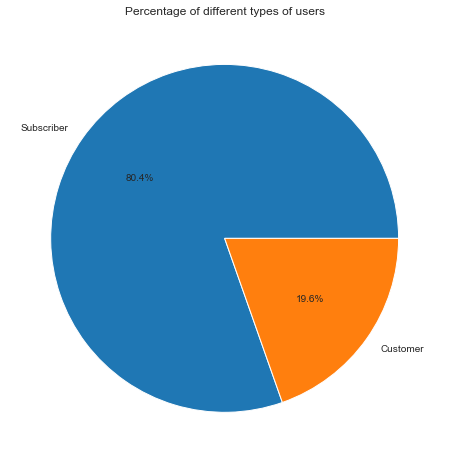

In [22]:
# Create a pie plot with the different percentages of users
bike_data.user_type.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8));
plt.title('Percentage of different types of users')
plt.ylabel('')
plt.show()

## Types of user per month

The amount of customers and subscribers increase during the summer and then it decrease on the winter. In the case of the subscribers, we can see an increment in `December` but actually it looks like it should be a decrease, so this is also interesting to take into account.

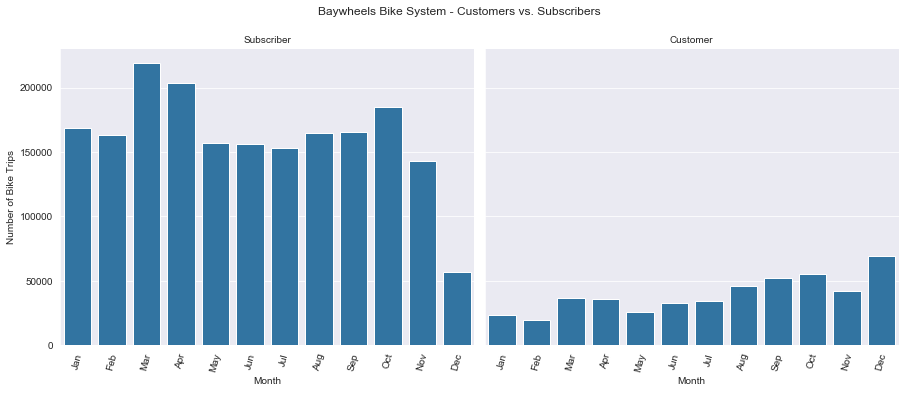

In [23]:
no_color = sns.color_palette()[0]

graph = sns.catplot(data=bike_data, x='start_month_name', col="user_type", kind='count', sharey = True, color = no_color, aspect=1.25, height=5,);
graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");
graph.fig.suptitle('Baywheels Bike System - Customers vs. Subscribers', y=1.05, fontsize=12);
graph.set_xticklabels(rotation=75);

## Start and ends of the rides for each type of user

In this case, as we saw before, there is a high demand at 8-9 am and then at 5 - 6 pm. Basically when the people start and end of the work. If we look on the subscribers and customers, we can see that there are more customers using it at the afternoon compared on the moorning.

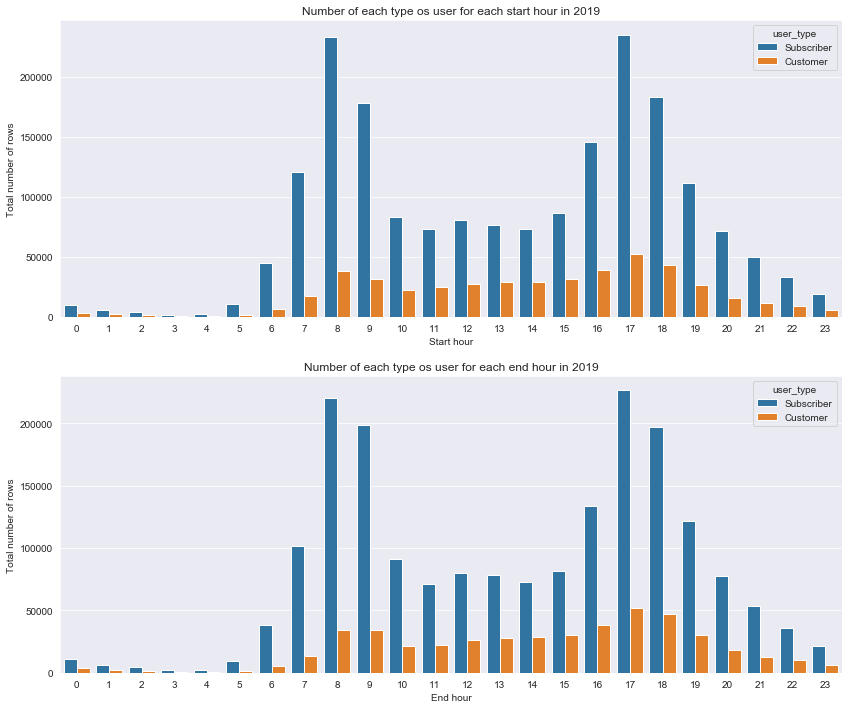

In [24]:
# Plot number of user type by hour
fig, ax = plt.subplots(nrows=2, figsize = [14,12])
sns.countplot(data = bike_data, x = 'start_hour', hue = 'user_type', ax = ax[0]);
sns.countplot(data = bike_data, x = 'end_hour', hue = 'user_type', ax = ax[1]);
ax[0].set_xlabel('Start hour');
ax[0].set_ylabel('Total number of rows');
ax[0].set_title('Number of each type os user for each start hour in 2019');
ax[1].set_xlabel('End hour');
ax[1].set_ylabel('Total number of rows');
ax[1].set_title('Number of each type os user for each end hour in 2019');
plt.show()

## Customer Usage by Weekday vs. Subscriber Usage by Weekday
The point plot above is an excellent visual showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on Fridays. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

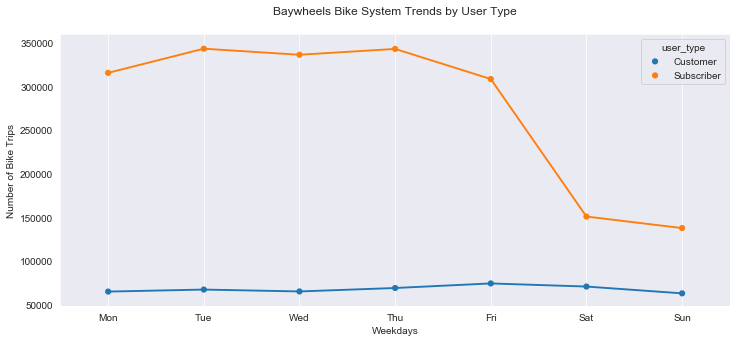

In [25]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

bike_data_user_week = bike_data.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.pointplot(data=bike_data_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Baywheels Bike System Trends by User Type', y=1.05, fontsize=12)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

## Customer Usage by Duration vs. Subscriber Usage by Duration
The plots above show the ride duration spread in minutes (note the y-axis isn't shared between the Customer and Subscriber graphs for visualization purposes). Customer typically have trip durations are longer (8 to 18 minutes according to the box plot) than for subscribers (5 to 12 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

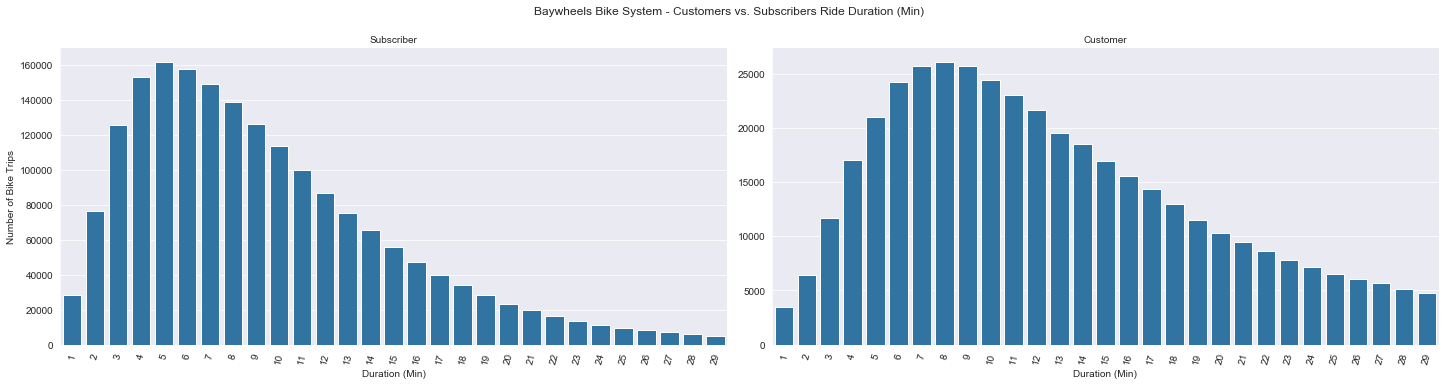

In [26]:
# Customer Usage by Duration vs. Subscriber Usage by Duration
data = bike_data.query('duration_min < 30')

graph = sns.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);
graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')
graph.fig.suptitle('Baywheels Bike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=12);
graph.set_xticklabels(rotation=75);

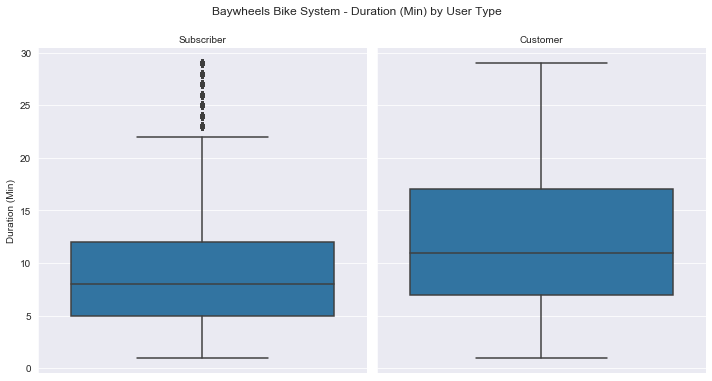

In [27]:
g = sns.catplot(data=data, y='duration_min', col="user_type", kind='box', color = no_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Baywheels Bike System - Duration (Min) by User Type', y=1.05, fontsize=12);

## List of the top 10 start stations
In the top ten stations the `Subscribers` users are higher when are compared with `Customers` user type.

In [31]:
# List with the top 10 start stations
list_top10_start_stations = bike_data.query('start_year == 2019').start_station_id.value_counts()[0:10].reset_index()['index']

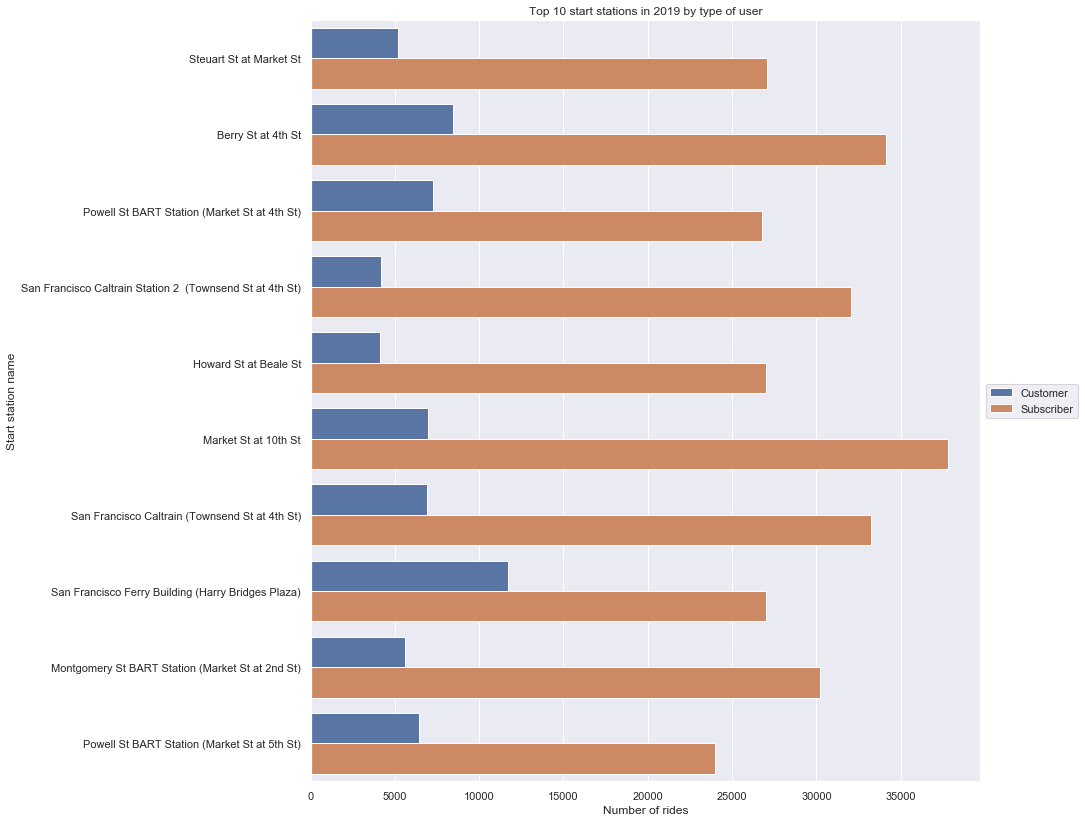

In [34]:
plt.figure(figsize=(12,14));

sns.countplot(data=bike_data.query('(start_year == 2019) and (start_station_id in @list_top10_start_stations)'),\
              y='start_station_name', hue='user_type');

plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
plt.title('Top 10 start stations in 2019 by type of user');
plt.ylabel('Start station name');
plt.xlabel('Number of rides');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!